In [ ]:
#libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download and load the CSV data set into pandas data frame
link = 'https://drive.google.com/open?id=1fUb18gEWBUhPBSc_amNSMH6acxqMAvwu' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('h1b_kaggle.csv')  
raw_dataset = pd.read_csv('h1b_kaggle.csv')
# Dataset is now stored in a Pandas Dataframe

1fUb18gEWBUhPBSc_amNSMH6acxqMAvwu


In [ ]:
raw_dataset.info()
#raw_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [ ]:
#renaming the unnamed column
raw_dataset = raw_dataset.rename(columns = {'Unnamed: 0' : 'CASE_NUMBER'})

In [ ]:
#ANALYSING PRE PROCESSED DATA
#total petitions
print(raw_dataset['CASE_NUMBER'].value_counts().sum())

#top 5 employers filing the petition
print(raw_dataset['EMPLOYER_NAME'].value_counts().head(5))

#top 5 jobs the petitions are signed for
print(raw_dataset['JOB_TITLE'].value_counts().head(5))

#analysing the attributes manually
# ftp = raw_dataset['FULL_TIME_POSITION']=='Y'
# c = raw_dataset['CASE_STATUS']=='CERIFIED'
# print(round(len(raw_dataset[ftp])/len(raw_dataset)*100,2), "% of petitioners apply for a full time job")


3002458
INFOSYS LIMITED                      130592
TATA CONSULTANCY SERVICES LIMITED     64726
WIPRO LIMITED                         48117
DELOITTE CONSULTING LLP               36742
IBM INDIA PRIVATE LIMITED             34219
Name: EMPLOYER_NAME, dtype: int64
PROGRAMMER ANALYST     249038
SOFTWARE ENGINEER      121307
COMPUTER PROGRAMMER     70570
SYSTEMS ANALYST         61965
SOFTWARE DEVELOPER      42907
Name: JOB_TITLE, dtype: int64


In [ ]:
# factorizing the columns
raw_dataset['CASE_STATUS'] = raw_dataset['CASE_STATUS'].astype('category')
raw_dataset['YEAR'] = raw_dataset['YEAR'].astype('category')
raw_dataset['FULL_TIME_POSITION'] = raw_dataset['FULL_TIME_POSITION'].astype('category')
raw_dataset['JOB_TITLE'] = raw_dataset['JOB_TITLE'].astype('category')
raw_dataset['SOC_NAME'] = raw_dataset['SOC_NAME'].astype('category')
raw_dataset['EMPLOYER_NAME'] = raw_dataset['EMPLOYER_NAME'].astype('category')

print("CASE STATUS total categories: ", raw_dataset['CASE_STATUS'].value_counts().count())
print("YEAR total categories: ",raw_dataset['YEAR'].value_counts().count())
print("FULL TIME POSITION total categories: ",raw_dataset['FULL_TIME_POSITION'].value_counts().count())
print("JOB TITLE categories: ",raw_dataset['JOB_TITLE'].value_counts().count())
print("SOC NAME total categories: ",raw_dataset['SOC_NAME'].value_counts().count())
print("EMPLOYER NAME total categories: ",raw_dataset['EMPLOYER_NAME'].value_counts().count())

CASE STATUS total categories:  7
YEAR total categories:  6
FULL TIME POSITION total categories:  2
JOB TITLE categories:  287549
SOC NAME total categories:  2132
EMPLOYER NAME total categories:  236013


In [ ]:
#creating data frame
df = pd.DataFrame(raw_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
 9   lon                 float64 
 10  lat                 float64 
dtypes: category(6), float64(3), int64(1), object(1)
memory usage: 175.8+ MB


In [ ]:
#Checking for null values in each column
print("Null Values/NAs Exist: ", df.isnull().values.any())
print(df.isnull().sum())
print("Total tuples with null values: ", df.isnull().sum().sum())
print("Proportion of missing values: ", round((df.isnull().sum().sum()/len(df))*100,2))


Null Values/NAs Exist:  True
CASE_NUMBER                0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64
Total tuples with null values:  232446
Proportion of missing values:  7.74


In [ ]:
# droping the longitude and latitude column because of redundancy
# we already have loaction in the different column
df = df.drop(['lon', 'lat'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 9 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 130.0+ MB


In [ ]:
#Dropping the missing values
df2 = df.dropna(how = "any")
df = df2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984609 entries, 0 to 3002444
Data columns (total 9 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 152.2+ MB


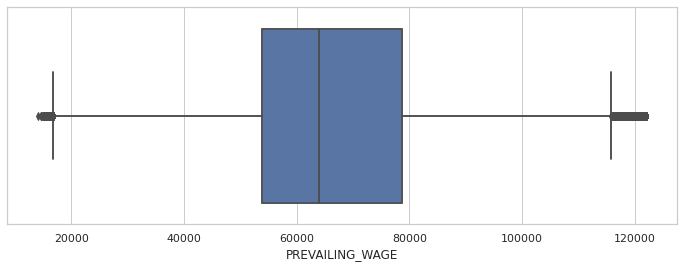

In [ ]:
#checking for outliers
# by plotting the box plot
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (12, 4))
#sns.boxplot(df['PREVAILING_WAGE'])
sns.boxplot(x = df['PREVAILING_WAGE'])
ax = sns.boxplot(x = df['PREVAILING_WAGE'], showfliers=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828059 entries, 0 to 3002444
Data columns (total 9 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 145.5+ MB


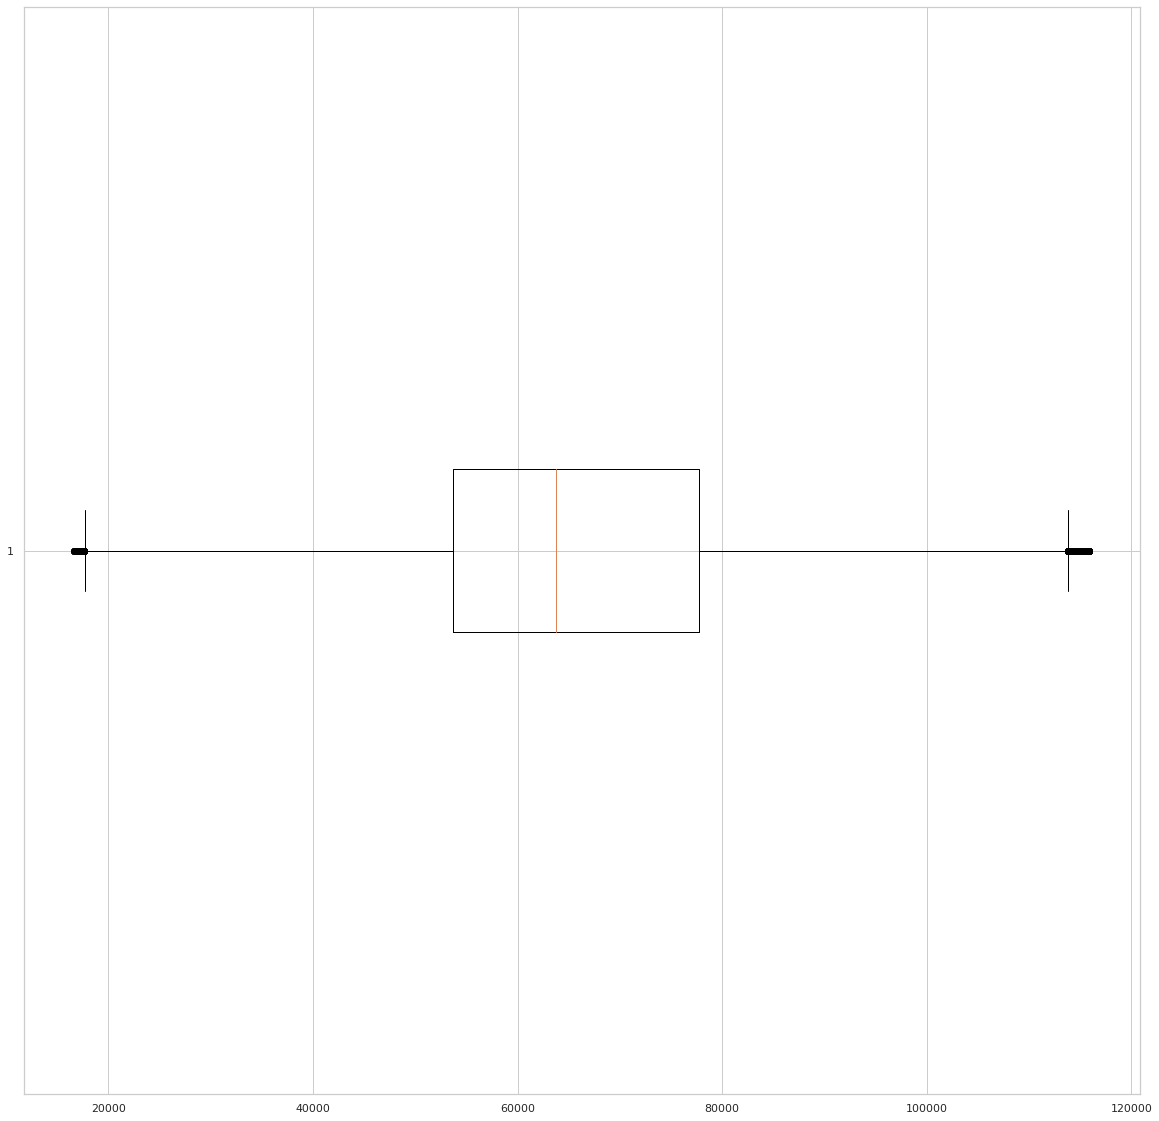

In [ ]:
# Removing the outliers by making upper limit and lower limit
# by the help of inter quartile range
q1 = df['PREVAILING_WAGE'].quantile(0.25)
q3 = df['PREVAILING_WAGE'].quantile(0.75)
iqr = (q3 - q1)
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df[df['PREVAILING_WAGE'] > upper_limit]
df[df['PREVAILING_WAGE'] < lower_limit]
new_df = df[df['PREVAILING_WAGE'] < upper_limit]
new_df = new_df[new_df['PREVAILING_WAGE'] > lower_limit]
new_df.shape

plt.boxplot(new_df['PREVAILING_WAGE'], vert=False)
df = new_df
df.info()


In [ ]:
# okay so now we have 6 different types of category for our target column
df['CASE_STATUS'].unique()

['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'WITHDRAWN', 'REJECTED', 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASS...]
Categories (6, object): ['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'WITHDRAWN', 'REJECTED',
                         'PENDING QUALITY AND COMPLIANCE REVIEW - UNASS...]

In [ ]:
#drop rows with withdrawn 
df = df[df['CASE_STATUS'] != 'WITHDRAWN']
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782581 entries, 0 to 3002392
Data columns (total 9 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 143.5+ MB


In [ ]:
# since we're solving the predictions by binary classifier we'll convert 6 categories into 2: 'CERTIFIED', 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'
df['CASE_STATUS'] = pd.Categorical(df['CASE_STATUS'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing 

In [ ]:
# Over here we are filtering the SOC_Category Column
# by searching the keywords from SOC_NAME and categorizing/minimizing the unique categories
warnings.filterwarnings("ignore") 
df['SOC_CATEGORY'] = np.nan 
df['SOC_CATEGORY'] = df['SOC_CATEGORY'].astype('object') 
df['SOC_NAME'] = df['SOC_NAME'].str.lower() 
df['SOC_NAME'] = df['SOC_NAME'].astype('category')
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('computer','programmer')] = 'CS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('software', 'web developer')] = 'CS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('database')] = 'CS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('math','statistic')] = 'Mathematics'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('predictive model', 'stats')] = 'Mathematics'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('teacher','linguist')] = 'Education'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('professor', 'teach')] = 'Education'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('school principal')] = 'Education'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('psychiatr','medical')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('doctor','physician')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('dentist','health')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('physical','therapist')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('surgeon', 'nurse')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('gynecologist')] = 'Medical Specialty'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('biology','biologi')] = 'Sciences and Research'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('chemist', 'physicist')] = 'Sciences and Research'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('scientist','clinical research')] = 'Sciences and Research'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('geo')] = 'Sciences and Research'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('public relation','manage')] = 'Management'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains( 'management','operation')] = 'Management'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('chief','plan')] = 'Management'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('executive')] = 'Management'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('advertise', 'advertis')] = 'Marketing'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('marketing', 'promotion')] = 'Marketing'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('marketing research')] = 'Marketing'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('business','business analyst')] = 'Business'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('business systems analyst')] = 'Business'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('accountant','finance')] = 'Accounting and Finance'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('account','financial')] = 'Accounting and Finance'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('auditor')] = 'Accounting and Finance'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('engineer','architect')] = 'Engineering and Architecture'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('surveyor', 'carto')] = 'Engineering and Architecture'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('technician', 'drafter')] = 'Engineering and Architecture'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('language','literature')] = 'ARTS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('entertainment', 'actor')] = 'ARTS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('artist','craft')] = 'ARTS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('creative','cook')] = 'ARTS'
df.SOC_CATEGORY[df['SOC_NAME'].str.contains('anthro','art')] = 'ARTS'
df['SOC_CATEGORY']= df.SOC_CATEGORY.replace(np.nan, 'Others', regex=True)

In [ ]:
# Simmilarly well categories the Employee_Name column aswell
# Well create EMPLOYER_CATEGORY column and asign the respective fields to that category
df['EMPLOYER_CATEGORY'] = np.nan
df['EMPLOYER_CATEGORY'] = df['EMPLOYER_CATEGORY'].astype('object') 
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].astype('category')
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('university')] = 'UNIVERSITY'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('inc')] = 'INCORPORATED ORGANISATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('llc')] = 'LIMITED LIABILITY ORGANISATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('corporation','corp')] = 'CORPORATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('hospital', 'medical')] = 'NON-PROFIT ORGANISATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('medical center', 'health')] = 'NON-PROFIT ORGANISATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('ltd','pvt')] = 'PRIVATE LIMITED ORGANISATION'
df.EMPLOYER_CATEGORY[df['EMPLOYER_NAME'].str.contains('lp')] = 'LIMITED PARTNERSHIP ORGANISATION'
df['EMPLOYER_CATEGORY']= df.EMPLOYER_CATEGORY.replace(np.nan, 'Others', regex=True)

In [ ]:
# Okay over here we have worksite column
# from which we fetch the state by splitting through commas
df['STATE'] = np.nan 
df['STATE'] = df['STATE'].astype('object') 
df['STATE'] = df.WORKSITE.str.split(', ').str[-1]


In [ ]:
# Since its a binary classifier problem
# well rename the value as 1s and 0s 'CERTIFIED':1, 'DENIED':0 respectively
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED':1, 'DENIED':0})
df['CASE_STATUS'] = df['CASE_STATUS'].astype(int)
df['CASE_STATUS'] = pd.Categorical(df['CASE_STATUS'])


1    2695726
0      86855
Name: CASE_STATUS, dtype: int64


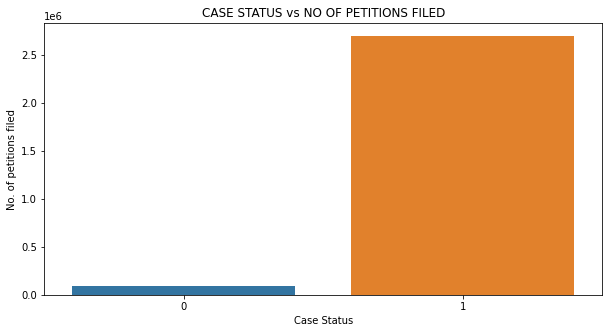

In [ ]:
#checking for imbalnce class problem
print(df['CASE_STATUS'].value_counts())
fig = plt.figure(figsize = (10, 5))
sns.countplot(x="CASE_STATUS", data=df)
 
plt.xlabel("Case Status")
plt.ylabel("No. of petitions filed")
plt.title("CASE STATUS vs NO OF PETITIONS FILED")
plt.show()

#imbalance class problem exists here which will be solved later
#more certified cases than denied cases

In [ ]:
df.info()
#df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782581 entries, 0 to 3002392
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_NUMBER         int64   
 1   CASE_STATUS         category
 2   EMPLOYER_NAME       category
 3   SOC_NAME            category
 4   JOB_TITLE           category
 5   FULL_TIME_POSITION  category
 6   PREVAILING_WAGE     float64 
 7   YEAR                category
 8   WORKSITE            object  
 9   SOC_CATEGORY        object  
 10  EMPLOYER_CATEGORY   object  
 11  STATE               object  
dtypes: category(6), float64(1), int64(1), object(4)
memory usage: 207.1+ MB


In [ ]:
# we will now just drop the columns that we donot need
# these are those columns that we categorised by searching for the keywords and assignimg them value in a new column
new_df = df.drop(['CASE_NUMBER', 'EMPLOYER_NAME', 'SOC_NAME', 'WORKSITE', 'JOB_TITLE'], axis=1)
# and now we will categorise the new columns we made aswell
new_df['SOC_CATEGORY'] = new_df['SOC_CATEGORY'].astype('category')
new_df['EMPLOYER_CATEGORY'] = new_df['EMPLOYER_CATEGORY'].astype('category')
new_df['STATE'] = new_df['STATE'].astype('category')
# as now you acn see we have reduced the attributes/columns for our models to learn better
new_df.info()

print("CASE STATUS total categories: ", new_df['CASE_STATUS'].value_counts().count())
print("YEAR total categories: ",new_df['YEAR'].value_counts().count())
print("FULL TIME POSITION total categories: ",new_df['FULL_TIME_POSITION'].value_counts().count())
print("STATE categories: ",new_df['STATE'].value_counts().count())
print("SOC CATEGORY total categories: ",new_df['SOC_CATEGORY'].value_counts().count())
print("EMPLOYER CATEGORY total categories: ",new_df['EMPLOYER_CATEGORY'].value_counts().count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782581 entries, 0 to 3002392
Data columns (total 7 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_STATUS         category
 1   FULL_TIME_POSITION  category
 2   PREVAILING_WAGE     float64 
 3   YEAR                category
 4   SOC_CATEGORY        category
 5   EMPLOYER_CATEGORY   category
 6   STATE               category
dtypes: category(6), float64(1)
memory usage: 58.4 MB
CASE STATUS total categories:  2
YEAR total categories:  6
FULL TIME POSITION total categories:  2
STATE categories:  53
SOC CATEGORY total categories:  12
EMPLOYER CATEGORY total categories:  8


In [ ]:
train, test= train_test_split(new_df, test_size = 0.3, random_state=18648)


In [ ]:
#looking for Nas
train.isnull().values.any()

False

count0 1887004
count1 60802


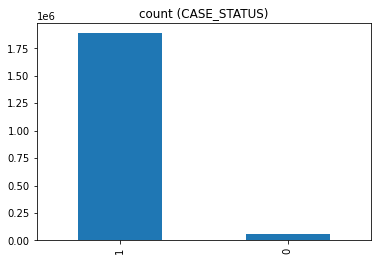

In [ ]:
train['CASE_STATUS'].value_counts().plot(kind='bar', title='count (CASE_STATUS)')
count0 = train['CASE_STATUS'].value_counts()[1]
print("count0", train['CASE_STATUS'].value_counts()[0])
print("count1", train['CASE_STATUS'].value_counts()[1])
# fig = plt.figure()
# ax = fig.add_axes([0,0,0.5,0.5])
# ax.bar(0.5, train['CASE_STATUS'].value_counts()[0], color = 'b', width = 0.1, tick_label=['CASE_STATUS_0'])
# ax.bar(1, train['CASE_STATUS'].value_counts()[1], color = 'r', width = 0.1, tick_label=['CASE_STATUS_1'])
#train[train['CASE_STATUS'] == 0]

Class count before under-sampling is performed
class 0/denied: (60802, 7)
class 1/certified: (1887004, 7)


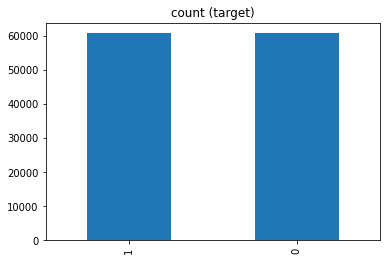

In [ ]:
#RANDOM UNDER SAMPLING   

# class count
count0 = train['CASE_STATUS'].value_counts()[1]
count1 = train['CASE_STATUS'].value_counts()[0]

# Separate class
case_status_0 = train[train['CASE_STATUS'] == 0]
case_status_1 = train[train['CASE_STATUS'] == 1]# print the shape of the class
print("Class count before under-sampling is performed")
print('class 0/denied:', case_status_0.shape)
print('class 1/certified:', case_status_1.shape)
#as we saw earlier, there exists a 1:33 ratio in the imbalance class problem since there are more 1s than 0s

undersampling = case_status_1.sample(count0, replace=True)

train_under = pd.concat([undersampling, case_status_0], axis=0)
train_under['CASE_STATUS'].value_counts()

#imbalance class problem solved
train_under['CASE_STATUS'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
#LABEL ENCODING

train_under['FULL_TIME_POSITION'] = pd.Categorical(train_under['FULL_TIME_POSITION'])
train_under['YEAR'] = pd.Categorical(train_under['YEAR'])
train_under['SOC_CATEGORY'] = pd.Categorical(train_under['SOC_CATEGORY'])
train_under['EMPLOYER_CATEGORY'] = pd.Categorical(train_under['EMPLOYER_CATEGORY'])
train_under['STATE'] = pd.Categorical(train_under['STATE'])

test['FULL_TIME_POSITION'] = pd.Categorical(test['FULL_TIME_POSITION'])
test['YEAR'] = pd.Categorical(test['YEAR'])
test['SOC_CATEGORY'] = pd.Categorical(test['SOC_CATEGORY'])
test['EMPLOYER_CATEGORY'] = pd.Categorical(test['EMPLOYER_CATEGORY'])
test['STATE'] = pd.Categorical(test['STATE'])

le = preprocessing.LabelEncoder()
for var in ['FULL_TIME_POSITION', 'YEAR', 'SOC_CATEGORY', 'EMPLOYER_CATEGORY', 'STATE']:
      train_under[var] = le.fit_transform(train_under[var])
     # inv_train_under[var] = le.inverse_transform(train_under[var])
      test[var] = le.fit_transform(test[var])
    #  inv_test[var] = le.inverse_transform(test[var])

  

In [ ]:
#attr = new_df.drop('CASE_STATUS', axis=1)
#class_attr = new_df.CASE_STATUS
#attr_train, attr_test, class_attr_train, class_attr_test = train_test_split(train, test)

attr_train = train_under.drop(['CASE_STATUS'], axis = 1)
class_train = train_under.iloc[:,:1]
attr_test = test.drop(['CASE_STATUS'], axis = 1)
class_test = test.iloc[:,:1]
#attr_train.info()

#attr_test.info()
attr_train.head(4)

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_CATEGORY,EMPLOYER_CATEGORY,STATE
1522106,1,52770.0,3,3,0,31
181919,1,84864.0,5,3,5,31
969223,1,71802.0,4,3,2,21
1535463,0,46904.0,3,0,1,4


In [ ]:
print(attr_train.columns.values)


['FULL_TIME_POSITION' 'PREVAILING_WAGE' 'YEAR' 'SOC_CATEGORY'
 'EMPLOYER_CATEGORY' 'STATE']


In [ ]:
def evaluation_metric(y_test, y_pred):     
       
    print("Report : ")
    print(classification_report(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
    print("Precision:",metrics.precision_score(y_test, y_pred)*100)
    print("Recall:",metrics.recall_score(y_test, y_pred)*100)


In [ ]:
# Line Plot Over The Year Attribute
def line_plot(x_axis, y_axis, title):
  fig, ax = plt.subplots()  # Create a figure containing a single axes.
  ax.plot(x_axis, y_axis)  # Plot some data on the axes.
  ax.set_title(title) 
# line_plot([1,2,3,4], [1,4,3,2])

In [ ]:
def plot_attr_against_case(list0, list1,category, title):
  df = pd.DataFrame({'Denied': list0,
                   'Certified': list1},
                   index=category)
  ax = df.plot.barh(color={"Denied": "red", "Certified": "green"})
  # ax = df.plot.bar(rot=0, subplots=True)
  ax.set_title(title) 
  # ax.set_autoscale_on()

Predicted values:
[1 0 0 ... 1 1 1]
classpred  [1 0 0 ... 1 1 1]
Report : 
              precision    recall  f1-score   support

           0       0.07      0.65      0.13     26053
           1       0.98      0.72      0.83    808722

    accuracy                           0.72    834775
   macro avg       0.53      0.69      0.48    834775
weighted avg       0.96      0.72      0.81    834775

Accuracy: 71.9050043424875
Precision: 98.46581854522864
Recall: 72.12367166962194
[[ 16965   9088]
 [225442 583280]]


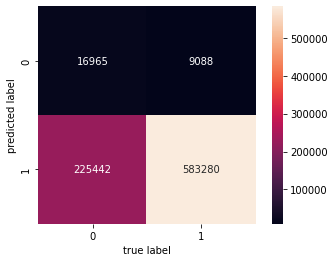

In [ ]:
#DECISION TREE
def train_using_gain(X_train, y_train):
  
    # Creating the classifier object
    clf_gain = DecisionTreeClassifier(criterion = "entropy", random_state = 18648,max_depth=10, min_samples_leaf=5)
  
    # Performing training
    clf_gain.fit(X_train, y_train)
    return clf_gain

def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

dtprediction = prediction(attr_test, train_using_gain(attr_train, class_train))
print("classpred " ,dtprediction)
evaluation_metric(class_test, dtprediction)

cmdt = confusion_matrix(class_test, dtprediction)
print(cmdt)
sns.heatmap(cmdt, annot=True, square= True, fmt ='d')
plt.xlabel('true label')
plt.ylabel('predicted label');



Report : 
              precision    recall  f1-score   support

           0       0.06      0.54      0.11     26053
           1       0.98      0.74      0.84    808722

    accuracy                           0.73    834775
   macro avg       0.52      0.64      0.48    834775
weighted avg       0.95      0.73      0.82    834775

Accuracy: 73.18666706597587
Precision: 98.04940563720457
Recall: 73.7908700393955
Optimization terminated successfully.
         Current function value: 0.618546
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            CASE_STATUS   No. Observations:               121604
Model:                          Logit   Df Residuals:                   121597
Method:                           MLE   Df Model:                            6
Date:                Fri, 31 Dec 2021   Pseudo R-squ.:                  0.1076
Time:                        11:59:11   Log-Likelihood:                -75218.
conve

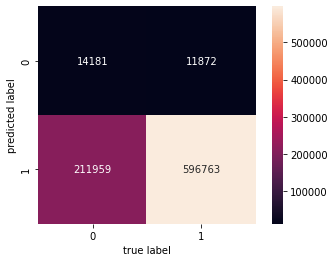

In [ ]:
#BINARY LOGISTIC REGRESSION
logreg = LogisticRegression(class_weight = "balanced")
logreg.fit(attr_train, class_train)
predictions = logreg.predict(attr_test)

evaluation_metric(class_test, predictions)

logit_model = sm.Logit(class_train, sm.add_constant(attr_train)).fit()
print(logit_model.summary())

cmlogreg = confusion_matrix(class_test, predictions)
print(cmlogreg)
sns.heatmap(cmlogreg, annot=True, square= True, fmt ='d')
plt.xlabel('true label')
plt.ylabel('predicted label');

#higher the coeff the better

[0 0 0 ... 1 1 0]
Report : 
              precision    recall  f1-score   support

           0       0.06      0.65      0.11     26053
           1       0.98      0.68      0.80    808722

    accuracy                           0.68    834775
   macro avg       0.52      0.67      0.46    834775
weighted avg       0.95      0.68      0.78    834775

Accuracy: 67.95831212003235
Precision: 98.37494726756616
Recall: 68.05020761151546
[[ 16962   9091]
 [258385 550337]]


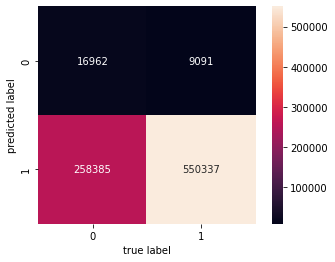

In [ ]:
classifier = GaussianNB()
classifier.fit(attr_train, class_train)
nbprediction  =  classifier.predict(attr_test)
print(nbprediction)
evaluation_metric(class_test, nbprediction)
cm = confusion_matrix(class_test, nbprediction)
print(cm)
sns.heatmap(cm, annot=True, square= True, fmt ='d')
plt.xlabel('true label')
plt.ylabel('predicted label');


In [ ]:
##somebody pls try knn

K = []
training = []
test = []
scores = {}
# class_pred = prediction(attr_test, train_using_gini(attr_train, attr_test, class_train))
for k in range(2, 5):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(attr_train, class_train)
    knnprediction = clf.predict(attr_test)
    evaluation_metric(class_test, knnprediction)
    print("Training And Testing for : " + str(k) + " neigbors completed.")



    # training_score = clf.score(attr_train, class_train)
    # test_score = clf.score(attr_test, class_test)
    # K.append(k)
  
    # training.append(training_score)
    # test.append(test_score)
    # scores[k] = [training_score, test_score]

Report : 
              precision    recall  f1-score   support

           0       0.05      0.74      0.09     26053
           1       0.98      0.55      0.70    808722

    accuracy                           0.55    834775
   macro avg       0.52      0.64      0.40    834775
weighted avg       0.96      0.55      0.68    834775

Accuracy: 55.15126830583091
Precision: 98.47283603410561
Recall: 54.55249146183731
Training And Testing for : 2 neigbors completed.
Report : 
              precision    recall  f1-score   support

           0       0.06      0.58      0.11     26053
           1       0.98      0.70      0.82    808722

    accuracy                           0.70    834775
   macro avg       0.52      0.64      0.46    834775
weighted avg       0.95      0.70      0.80    834775

Accuracy: 69.90662154472761
Precision: 98.1151290239061
Recall: 70.28744117261556
Training And Testing for : 3 neigbors completed.
Report : 
              precision    recall  f1-score   support

[[ 15133  10920]
 [240292 568430]]


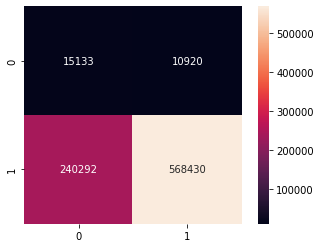

In [ ]:
 
# select maximum for the accuracy
# hence we can see 3 neighbours works best
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(attr_train, class_train)
knnprediction = clf.predict(attr_test)

cmknn = confusion_matrix(class_test, knnprediction)
print(cmknn)
sns.heatmap(cmknn, annot=True, square= True, fmt ='d')
  

In [ ]:
# Groupby Sorting Of the case status by year
grouped_df = raw_dataset.groupby('CASE_STATUS')
grouped_df = grouped_df.agg({'YEAR': 'value_counts'})
print(grouped_df)
uniqueYears = train['YEAR'].sort_values(ascending=False).unique()
print(uniqueYears)
# grouped_df = grouped_df.reset_index()

# for case label 0
list0Year = []
list0Count = []
for i in range(len(uniqueYears)):
  list0Year.append(uniqueYears[i])
  list0Count.append(grouped_df['YEAR'][i])

# for case label 1
list1Year = []
list1Count = []
for i in range(len(uniqueYears)):
  list1Year.append(uniqueYears[i])
  list1Count.append(grouped_df['YEAR'][11-i])

# for case label 3
list3Year = []
list3Count = []
for i in range(len(uniqueYears)):
  list1Year.append(uniqueYears[i])
  list1Count.append(grouped_df['YEAR'][11-i])

print("L0:",list0Count)
print("L0:",list0Year)
print("L1",list1Count)
print("L1:",list1Year)

                                                             YEAR
CASE_STATUS                                        YEAR          
CERTIFIED                                          2016.0  569646
                                                   2015.0  547278
                                                   2014.0  455144
                                                   2013.0  382951
                                                   2012.0  352668
                                                   2011.0  307936
CERTIFIED-WITHDRAWN                                2016.0   47092
                                                   2015.0   41071
                                                   2014.0   36350
                                                   2013.0   35432
                                                   2012.0   31118
                                                   2011.0   11596
DENIED                                             2011.0   29130
          

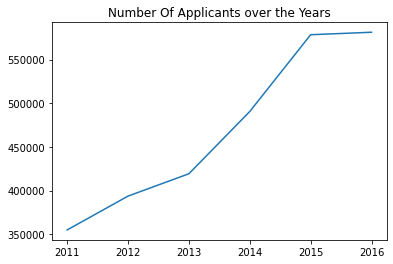

In [ ]:
#Yearwise Applications
applied = []
for i in range(len(uniqueYears)):
  total = (list1Count[i]+list0Count[i])
  applied.append(total)

line_plot(list0Year, applied,"Number Of Applicants over the Years")

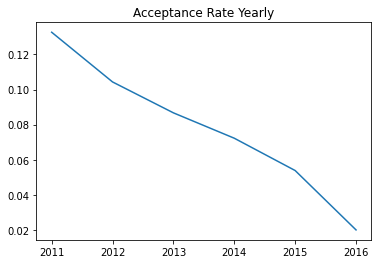

In [ ]:
# Acceptance Rate
acceptance_rate_yearly = []
for i in range(len(uniqueYears)):
  #Ratio of Accepted/Total Applied
  ary = list1Count[i] / (list1Count[i]+list0Count[i])
  acceptance_rate_yearly.append(ary)

line_plot(list0Year,acceptance_rate_yearly,"Acceptance Rate Yearly")  


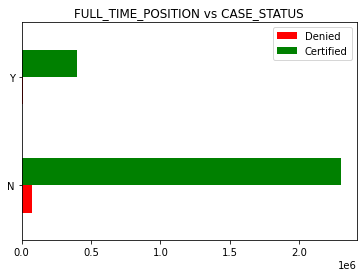

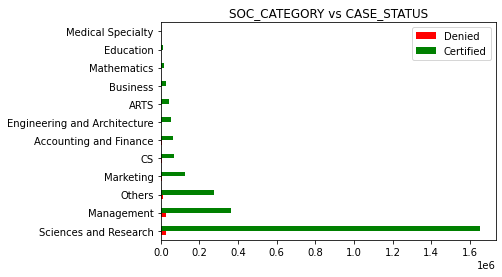

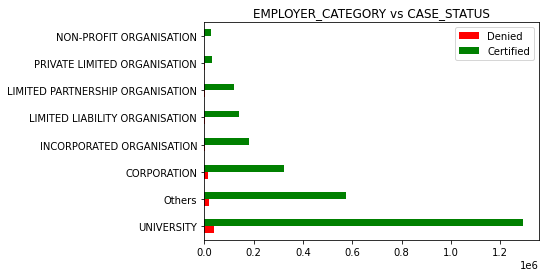

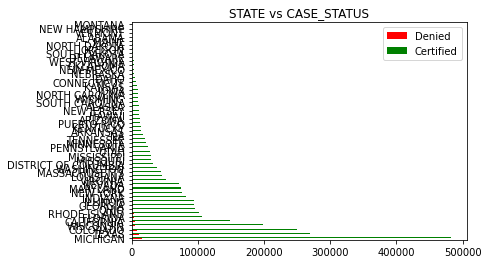

In [ ]:
#Bar chart with Respect to Case Studies
# print(df.info())
# list_of_atr = ['JOB_TITLE','FULL_TIME_POSITION','SOC_CATEGORY','EMPLOYER_CATEGORY','STATE']
list_of_atr = ['FULL_TIME_POSITION','SOC_CATEGORY','EMPLOYER_CATEGORY','STATE']

for atribute in list_of_atr:
  count = df[atribute].nunique()
  atrs = df[atribute].unique()
  grouped_df = df.sort_values(['CASE_STATUS', atribute],ascending=True).groupby('CASE_STATUS')
  grouped_df = grouped_df.agg({atribute: 'value_counts'},{atribute: 'order'})
  list0Count = []
  list0Atr = []
  list1Count = []
  list1Atr = []
  # print(grouped_df[atribute])
  for i in range(count):
    list0Count.append(grouped_df[atribute][i])
    list0Atr.append(atrs[i])
  for i in range(count):
    list1Count.append(grouped_df[atribute][i+count])
    list1Atr.append(atrs[i])
  # print("List0Count",list0Count)
  # print("List0Atrribute",list0Atr)
  plot_attr_against_case(list0Count, list1Count, list0Atr, atribute+" vs CASE_STATUS")
#the thing is order is different thats the problem


In [ ]:
print(type(grouped_df['STATE']))
print(grouped_df['STATE'])

<class 'pandas.core.series.Series'>
CASE_STATUS  STATE       
0            CALIFORNIA      16245
             NEW YORK        11624
             TEXAS            7960
             FLORIDA          5246
             NEW JERSEY       4612
                             ...  
1            SOUTH DAKOTA     1514
             PUERTO RICO      1180
             ALASKA           1119
             MONTANA           809
             WYOMING           646
Name: STATE, Length: 106, dtype: int64


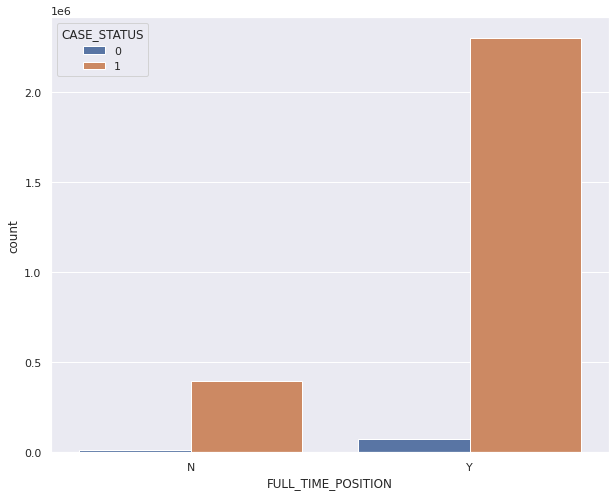

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(new_df['FULL_TIME_POSITION'], hue = new_df['CASE_STATUS'])

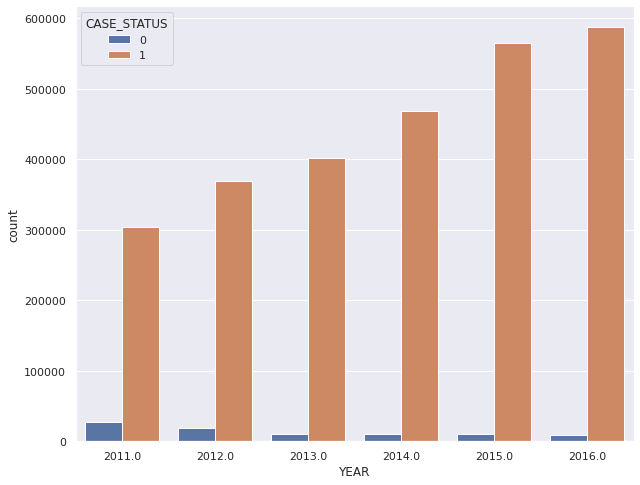

In [ ]:
#sns.countplot(new_df['CASE_STATUS'], hue = new_df['YEAR'])
sns.countplot(new_df['YEAR'], hue = new_df['CASE_STATUS'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

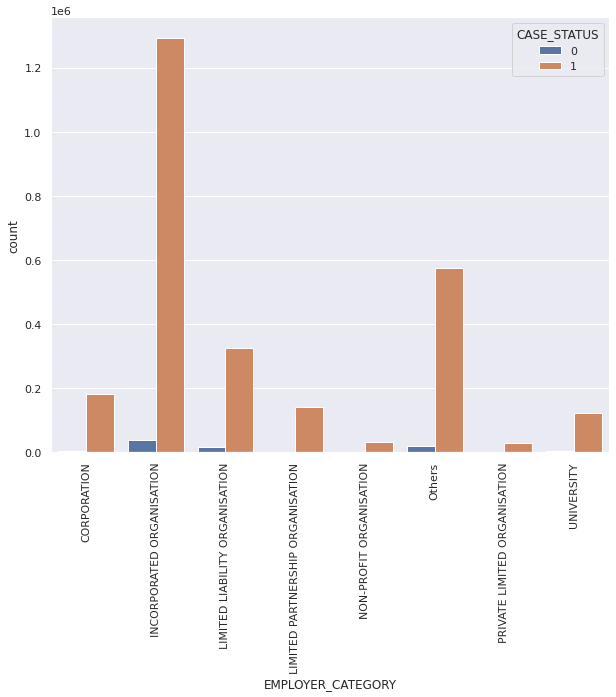

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(new_df['EMPLOYER_CATEGORY'], hue = new_df['CASE_STATUS'])

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

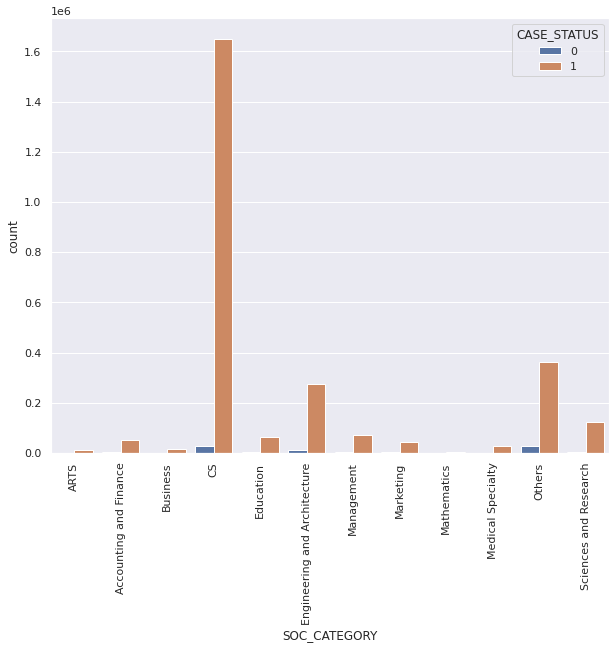

In [ ]:
sns.countplot(new_df['SOC_CATEGORY'], hue = new_df['CASE_STATUS'])

plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

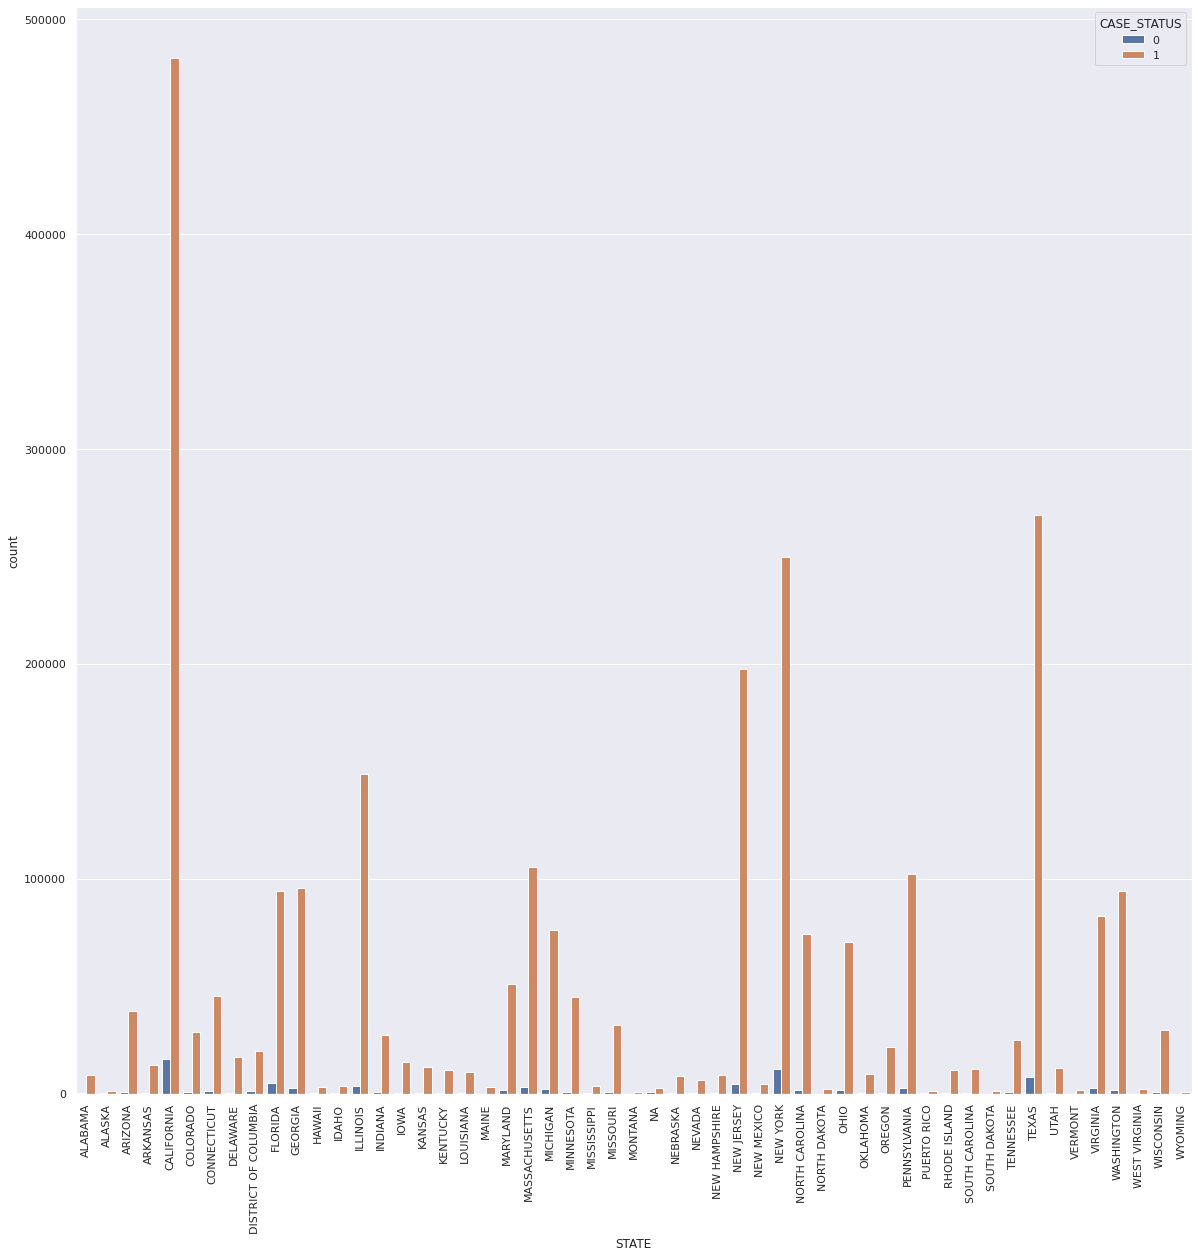

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.countplot(new_df['STATE'], hue = new_df['CASE_STATUS'])

plt.xticks(rotation=90)